In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt

2023-12-28 08:26:46.779093: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-28 08:26:48.164870: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-28 08:26:48.164954: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-28 08:26:48.182572: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 08:26:48.299828: I tensorflow/core/platform/cpu_feature_guar

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
train_images.shape

(50000, 32, 32, 3)

In [8]:
train_labels.shape

(50000, 1)

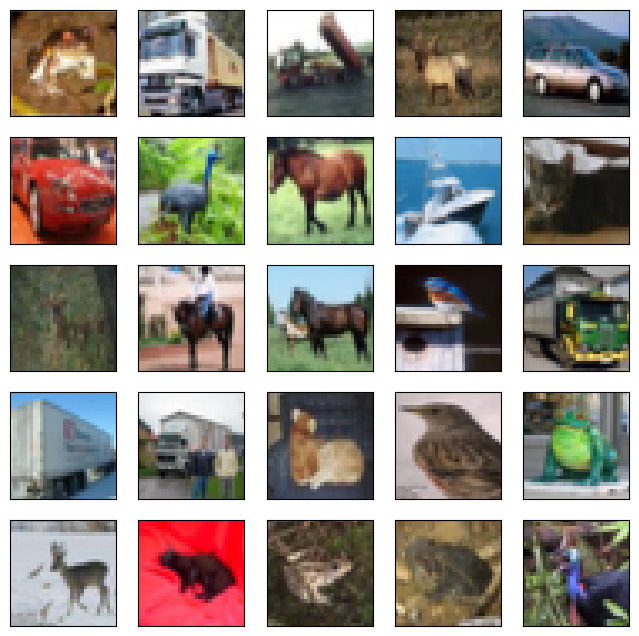

In [5]:
plt.figure(figsize=(8,8))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])

In [6]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [7]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [12]:
def process_image(image, label):
    image = tf.image.per_image_standardization(image)
    image = tf.image.resize(image, (64,64))
    return image, label

In [14]:
# Checking the number of images in train and test dataset
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()

In [15]:
train_ds = (train_ds.map(process_image).shuffle(buffer_size=train_ds_size).batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds.map(process_image).shuffle(buffer_size=test_ds_size).batch(batch_size=32, drop_remainder=True))

In [16]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(32, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.uint8, name=None))>

### AlexNet Architecture

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

keras.backend.clear_session()

model = Sequential([
    Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3)),

    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    BatchNormalization(),

    Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding='same'),
    BatchNormalization(),

    Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (Batch  (None, 14, 14, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 128)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 256)         1024      
 chNormalization)                                                
                                                        

In [21]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

In [22]:
history = model.fit(train_ds, epochs=30, validation_data=test_ds)

Epoch 1/30
1562/1562 [==============================] - 78s 46ms/step - loss: 2.1069 - accuracy: 0.2600 - val_loss: 1.5666 - val_accuracy: 0.4369
Epoch 2/30
1562/1562 [==============================] - 74s 46ms/step - loss: 1.6807 - accuracy: 0.3892 - val_loss: 1.3937 - val_accuracy: 0.4956
Epoch 3/30
1562/1562 [==============================] - 73s 46ms/step - loss: 1.5042 - accuracy: 0.4591 - val_loss: 1.2909 - val_accuracy: 0.5360
Epoch 4/30
1562/1562 [==============================] - 73s 46ms/step - loss: 1.3829 - accuracy: 0.5044 - val_loss: 1.2280 - val_accuracy: 0.5619
Epoch 5/30
1562/1562 [==============================] - 73s 46ms/step - loss: 1.2798 - accuracy: 0.5409 - val_loss: 1.1663 - val_accuracy: 0.5855
Epoch 6/30
1562/1562 [==============================] - 73s 46ms/step - loss: 1.2000 - accuracy: 0.5722 - val_loss: 1.1102 - val_accuracy: 0.6024
Epoch 7/30
1562/1562 [==============================] - 73s 46ms/step - loss: 1.1317 - accuracy: 0.5986 - val_loss: 1.0836 -